In [24]:
from scipy.io import savemat, loadmat
import pandas as pd
import pdb
import json
import numpy as np
from numpy import median, mean
from sklearn.linear_model import BayesianRidge, LinearRegression, RidgeCV, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, LeaveOneOut
import pickle
import matplotlib.pyplot as plt

##  group contribution method linear regression 

Mean squared error: 45.20
Coefficient of determination: 0.9989


Text(0.7,0.25,'$R^2$ = 0.9989')

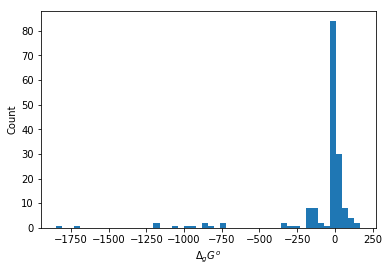

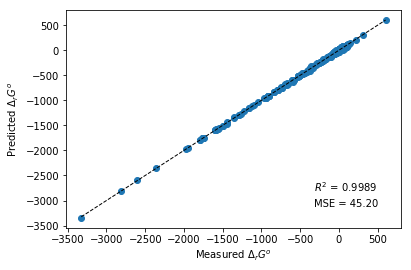

In [2]:
ac = loadmat('./data/component_contribution_python.mat')

S = ac['train_S']
G = ac['G']
b = ac['b']

m, n = S.shape
assert G.shape[0] == m
assert b.shape == (n, 1)

STG = np.dot(S.T,G)

X = STG
# y = b.flatten()
y = b

reg = LinearRegression(fit_intercept=False).fit(X, y)

# filename = './model/linearReg_ac_all_model.sav'
# pickle.dump(reg, open(filename, 'wb'))
# filename = './model/linearReg_ac_all_model.sav'
# outfilename = '../cache/db_ac_all/result_linearReg.csv'
# predict(filename,outfilename)
# pdb.set_trace()
predicted = reg.predict(X)

plt.hist(reg.coef_[0][0:163], bins=50)
# plt.xscale('log')
plt.xlabel('$\Delta_g G^o$')
plt.ylabel('Count')
# plt.savefig('./figures/linear_cc_groups.png')

mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print('Mean squared error: %.2f'
    % mse)
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
    % r2)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Measured $\Delta_r G^o$')
ax.set_ylabel('Predicted $\Delta_r G^o$')
plt.figtext(.7, .2, "MSE = %.2f" % mse)
plt.figtext(.7, .25, "$R^2$ = %.4f" % r2)
# plt.savefig('./figures/linear_regression_cc.png')

## Cross validation group contribution 

('median of cv is: ', 5.325898869063903)
('mean of cv is: ', 19.459570705989638)


Text(0,0.5,'Cumulative distribution')

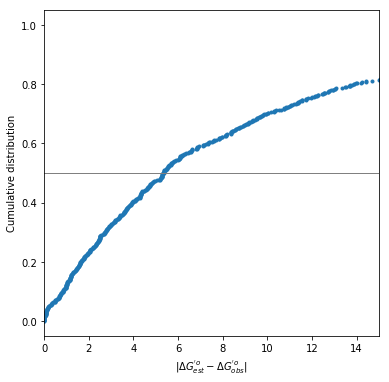

In [6]:
ac = loadmat('./data/component_contribution_python.mat')

S = ac['train_S']

df_S = pd.DataFrame(ac['train_S'])
df_S_unique = df_S.T.drop_duplicates().T
unque_cols = df_S_unique.columns.values.tolist()
S = S[:, unque_cols]

G = ac['G']

b_list = json.load(open('./data/median_b.json'))
b = np.asarray(b_list)
b = np.reshape(b,(-1,1))

m, n = S.shape
assert G.shape[0] == m
assert b.shape == (n, 1)

STG = np.dot(S.T,G)

X = STG
y = b


# cross validation
regression = LinearRegression(fit_intercept=False)
# lasso = linear_model.Lasso()

scores = -cross_val_score(regression, X, y, cv=LeaveOneOut(), scoring='neg_mean_absolute_error')
print('median of cv is: ', median(scores))
print('mean of cv is: ', mean(scores))


# print('std of cv is: ', scores.std)
x = np.sort(scores)
#     y = np.arange(1,len(x)+1)/len(x)
y = 1. * np.arange(len(x)) / (len(x) - 1)

fig = plt.figure(figsize=(6,6))
plt.xlim(right=15)
plt.plot(x,y,marker='.',linestyle='none')#,color="#273c75")
plt.axhline(y=0.5,linewidth=1,color='grey')
plt.xlabel('|$\Delta G^{\'o}_{est} - \Delta G^{\'o}_{obs}$|')
plt.ylabel('Cumulative distribution')
# fig.savefig('./figures/cross_validation_cc.jpg')
# plt.show()

## M1-linear model regression 

Mean squared error: 38.30
Coefficient of determination: 0.9990


Text(0.7,0.25,'$R^2$ = 0.9990')

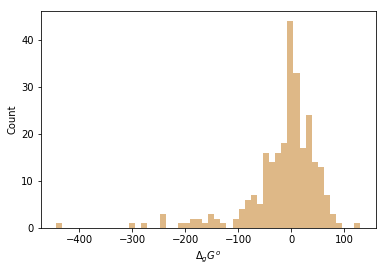

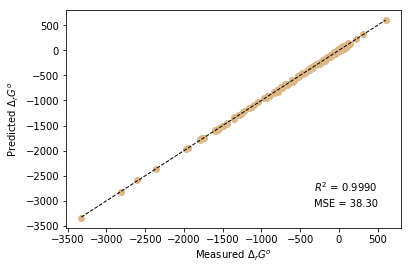

In [10]:
ac = loadmat('./data/dGPredictor_stereo.mat')

S = ac['train_S']

G = ac['G']
b = ac['b']


m, n = S.shape
assert G.shape[0] == m
assert b.shape == (n, 1)

STG = np.dot(S.T,G)

X = STG
# y = b.flatten()
y = b

# reg = LinearRegression(fit_intercept=False).fit(X, y)
alphas = np.logspace(-6, 6, 200)
reg = RidgeCV(alphas=alphas, fit_intercept=False ).fit(X, y)

plt.hist(reg.coef_[0][0:264], bins=50, color = 'burlywood')
# plt.xscale('log')
plt.xlabel('$\Delta_g G^o$')
plt.ylabel('Count')
# plt.savefig('./figures/ridge_groups.png')

predicted = reg.predict(X)

mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print('Mean squared error: %.2f'
    % mse)
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
    % r2)

fig, ax = plt.subplots()
ax.scatter(y, predicted, color = 'burlywood')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1,)
ax.set_xlabel('Measured $\Delta_r G^o$')
ax.set_ylabel('Predicted $\Delta_r G^o$')
plt.figtext(.7, .2, "MSE = %.2f" % mse)
plt.figtext(.7, .25, "$R^2$ = %.4f" % r2)
# plt.savefig('./figures/ridge_regression.png')
# plt.show()



## M1 linear model cross-validation

('median of cv is: ', 5.826162919031608)
('mean of cv is: ', 14.961333672834401)


Text(0,0.5,'Cumulative distribution')

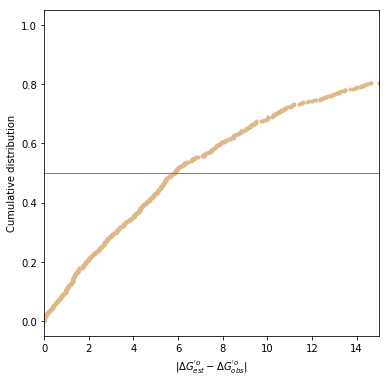

In [13]:
ac = loadmat('./data/dGPredictor_stereo.mat')

S = ac['train_S']

df_S = pd.DataFrame(ac['train_S'])
df_S_unique = df_S.T.drop_duplicates().T
unque_cols = df_S_unique.columns.values.tolist()
S = S[:, unque_cols]

G = ac['G']

b_list = json.load(open('./data/median_b_extended.json'))
b = np.asarray(b_list)
b = np.reshape(b,(-1,1))

m, n = S.shape
assert G.shape[0] == m
assert b.shape == (n, 1)

STG = np.dot(S.T,G)

X = STG
y = b

alphas = np.logspace(-6, 6, 200)

clf = RidgeCV(alphas=alphas, fit_intercept=False).fit(X, y)
# print(clf.alpha_)
clf_new = Ridge(alpha=clf.alpha_,fit_intercept=False)

# y_pred = clf.predict(X)
scores = -cross_val_score(clf_new, X, y, cv=LeaveOneOut(), scoring='neg_mean_absolute_error')

print('median of cv is: ', median(scores))
print('mean of cv is: ', mean(scores))

x = np.sort(scores)
y = 1. * np.arange(len(x)) / (len(x) - 1)

fig = plt.figure(figsize=(6,6))
plt.xlim(right=15)
plt.plot(x,y,marker='.',linestyle='none',color="burlywood")
plt.axhline(y=0.5,linewidth=1,color='grey')
plt.xlabel('|$\Delta G^{\'o}_{est} - \Delta G^{\'o}_{obs}$|')
plt.ylabel('Cumulative distribution')
#     fig.savefig('./figures/cross_validation_ridge.jpg')
# plt.show()


## M2-linearmodel regression analysis 

Mean squared error: 24.60


Text(0.7,0.25,'$R^2$ = 0.9994')

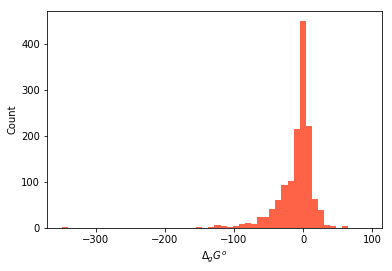

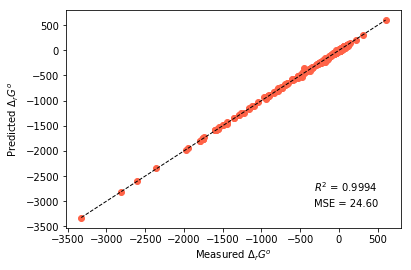

In [17]:
grp_inc = loadmat('./data/radius2_mat_data_modified_manual.mat')

b = grp_inc['b']
G = grp_inc['G_inc_r2_compar']    #group incidence matrix for training data
X = grp_inc['X_train']


# G = grp_inc['G_inc']    #group incidence matrix for KEGG data 
# X = grp_inc['X_all']

y = b

alphas = np.logspace(-6, 6, 200)
reg = RidgeCV(alphas=alphas, fit_intercept=False ).fit(X, y)


plt.hist(reg.coef_[0][0:1420], bins=50, color = 'tomato')#for ridgeCV


plt.xlabel('$\Delta_g G^o$')
plt.ylabel('Count')
# plt.savefig('./figures/ridge_group_info_radius2_manual_correct_new_color.png')

predicted= reg.predict(X)

mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print('Mean squared error: %.2f'
    % mse)
# The coefficient of determination: 1 is perfect prediction
# print('Coefficient of determination: %.4f'
#     % r2)

fig, ax = plt.subplots()
# ax.scatter(y, predicted, color = 'burlywood')
ax.scatter(y, predicted, color = 'tomato')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1,)
ax.set_xlabel('Measured $\Delta_r G^o$')
ax.set_ylabel('Predicted $\Delta_r G^o$')
plt.figtext(.7, .2, "MSE = %.2f" % mse)
plt.figtext(.7, .25, "$R^2$ = %.4f" % r2)


## M2-linear cross-validation 

0.46595256686646774
('median of cv is: ', 15.459406503469538)
('mean of cv is: ', 35.96342098706784)


Text(0,0.5,'Cumulative distribution')

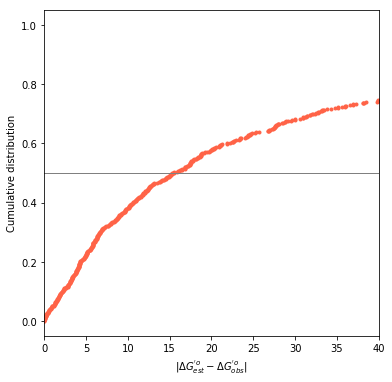

In [18]:
ac = loadmat('./data/radius2_mat_data_modified_manual.mat')
S = ac['train_S']

G = grp_inc['G_inc_r2_compar']

df_S = pd.DataFrame(ac['train_S'])
df_S_unique = df_S.T.drop_duplicates().T
unque_cols = df_S_unique.columns.values.tolist()
S = S[:, unque_cols]


b_list = json.load(open('./data/median_b_manual_correction_r2.json'))
b = np.asarray(b_list)
b = np.reshape(b,(-1,1))

m, n = S.shape
assert G.shape[0] == m
assert b.shape == (n, 1)

STG = np.dot(S.T,G)

X = STG
y = b

alphas = np.logspace(-6, 6, 200)

clf = RidgeCV(alphas=alphas, fit_intercept=False).fit(X, y)
print(clf.alpha_)
clf_new = Ridge(alpha=clf.alpha_,fit_intercept=False)

scores = -cross_val_score(clf_new, X, y, cv=LeaveOneOut(), scoring='neg_mean_absolute_error')
print('median of cv is: ', median(scores))
print('mean of cv is: ', mean(scores))

x = np.sort(scores)
y = 1. * np.arange(len(x)) / (len(x) - 1)

fig = plt.figure(figsize=(6,6))
plt.xlim(right=40)
# plt.plot(x,y,marker='.',linestyle='none',color="burlywood")
plt.plot(x,y,marker='.',linestyle='none',color="tomato")
plt.axhline(y=0.5,linewidth=1,color='grey')
plt.xlabel('|$\Delta G^{\'o}_{est} - \Delta G^{\'o}_{obs}$|')
plt.ylabel('Cumulative distribution')
# fig.savefig('./figures/cross_validation_ridge_radius2.jpg')
# plt.show()


## M-1,2-Linear model regression 

In [19]:
ac_1 = loadmat('./data/dGPredictor_stereo.mat')
grp_inc = loadmat('./data/radius2_mat_data_modified_manual.mat')

b = grp_inc['b']

## radius 1 input for regression layer 1:
G_rad1 = ac_1['G'];
S = ac_1['train_S'];
STG_rad1 = np.dot(S.T,G_rad1);
X_rad1 = STG_rad1;

## radius 2 input for regression layer 1:
G_rad2 = grp_inc['G_inc_r2_compar']
X_rad2 = grp_inc['X_train']

## expt data output 
y = b
y = y.flatten()


## regression for radius 1
alphas = np.logspace(-6, 6, 200)
regR_rad1 = RidgeCV(alphas=alphas, fit_intercept=False ).fit(X_rad1, y)

##  regression for radius 2 
regR_rad2 = RidgeCV(alphas=alphas, fit_intercept=False ).fit(X_rad2, y)

## regression for C1*reg1 + C2*reg2

predicted_r1_R = regR_rad1.predict(X_rad1)
predicted_r2_R = regR_rad2.predict(X_rad2)


X_new_R = np.vstack((predicted_r1_R, predicted_r2_R));
X_new_R = X_new_R.T;

regR_comR = RidgeCV(alphas=alphas, fit_intercept=False ).fit(X_new_R, y)


y_pred_comR_R = regR_comR.predict(X_new_R)
mse_comR_R = mean_squared_error(y, y_pred_comR_R)

print('Mean squared error: %.2f'
    % mse_comR_R)


18.805489429905823


## Manual leave one out cross-validation for M-1,2-linear model 

In [22]:
df_S = pd.DataFrame(ac_1['train_S'])
df_S_unique = df_S.T.drop_duplicates().T
unque_cols = df_S_unique.columns.values.tolist()
S_new = S[:, unque_cols]


b_list = json.load(open('./data/median_b_manual_correction_r2.json'))
b = np.asarray(b_list)
b = np.reshape(b,(-1,1))

# radius 1
X_nodup = np.dot(S_new.T,G_rad1)
#radius 2
X_nodup2 = np.dot(S_new.T,G_rad2)

y_nodup = b


len_val = len(X_nodup);

MAE_score = []
for i in range (len_val):
    temp_x_del = np.delete(X_nodup, i, 0);
    temp_x_del2 = np.delete(X_nodup2, i, 0);
    temp_y = np.delete(y_nodup, i, 0);

    alphas = np.logspace(-6, 6, 200);
    tridge = RidgeCV(alphas=alphas, fit_intercept=False ).fit(temp_x_del, temp_y);
    tridge2 = RidgeCV(alphas=alphas, fit_intercept=False ).fit(temp_x_del2, temp_y);

    temp_x_new = np.hstack((tridge.predict(temp_x_del), tridge2.predict(temp_x_del2)));
    temp_x_new = temp_x_new;


    temp_reg_2 = RidgeCV(alphas=alphas, fit_intercept=False ).fit(temp_x_new, temp_y);
    temp_pred_y = temp_reg_2.predict(temp_x_new)
    MAE_score.append(mean_absolute_error(temp_y, temp_pred_y))
    
    
print(median(MAE_score))
    

16.853183925828613


## regression M1, M2, M1-2 non linear model 

In [27]:
ac = loadmat('./data/Train_comb_NN_model.mat')

# M1 non-linear model 

y = ac['y']
y = y.flatten()

Xr1 = ac['X_r1_train']
max_i = 1000
regrr1 = MLPRegressor(solver = 'lbfgs', max_iter = max_i).fit(Xr1, y)
y_predr1 = regrr1.predict(Xr1)
mser1 = mean_squared_error(y, y_predr1)

print('radius 1 non-linear model')
print('Mean squared error: %.2f'
    % mser1)

# M2 non-linear model 

Xr2 = ac['X_r2_train']
regrr2 = MLPRegressor(solver = 'lbfgs', max_iter = max_i).fit(Xr2, y)
y_predr2 = regrr2.predict(Xr2)
mser2 = mean_squared_error(y, y_predr2)

print('radius 2 non-linear model')
print('Mean squared error: %.2f'
    % mser2)

## M1-2 non-linear model 

Xrc = ac['X_comb_train']
regr_rcombined = MLPRegressor(solver = 'lbfgs', max_iter = max_i).fit(Xrc, y)
y_pred_rc = regr_rcombined.predict(Xrc)
mse_rc = mean_squared_error(y, y_pred_rc)

print('radius 1+2 non-linear model')
print('Mean squared error: %.2f'
    % mse_rc)


radius 1 non-linear model
Mean squared error: 20.81
radius 2 non-linear model
Mean squared error: 6.92
radius 1+2 non-linear model
Mean squared error: 6.95


## cross-validation NN models

In [28]:
r1_d = loadmat('./data/dGPredictor_stereo.mat')
r2_d = loadmat('./data/radius2_mat_data_modified_manual.mat')
S = r1_d['train_S']

Gr1 = r1_d['G']
Gr2 = r2_d['G_inc_r2_compar']

df_S = pd.DataFrame(r1_d['train_S'])
df_S_unique = df_S.T.drop_duplicates().T
unque_cols = df_S_unique.columns.values.tolist()
S = S[:, unque_cols]

b_list = json.load(open('./data/median_b_manual_correction_r2.json')) # it will be same for both radius, it just remove all the repeated data points from the training data
b = np.asarray(b_list)
b = np.reshape(b,(-1,1))

STG1 = np.dot(S.T, Gr1)
STG2 = np.dot(S.T, Gr2)


X1 = STG1
X2 = STG2
yy = b
yy = yy.flatten()

## cross validation r =1
regr_cvr1 = MLPRegressor(solver = 'lbfgs', max_iter = 1000).fit(X1, yy)

scores_cv1 = -cross_val_score(regr_cvr1, X1, yy, cv=LeaveOneOut(), scoring='neg_mean_absolute_error')

print('cross-validataion result : radius 1')
print('median of cv is: ', median(scores_cv1))
print('mean of cv is: ', mean(scores_cv1))


## cross validation r =2 
regr_cvr2 = MLPRegressor(solver = 'lbfgs', max_iter = 1000).fit(X2, yy)

scores_cv2 = -cross_val_score(regr_cvr2, X2, yy, cv=LeaveOneOut(), scoring='neg_mean_absolute_error')

print('cross-validataion result : radius 2')
print('median of cv is: ', median(scores_cv2))
print('mean of cv is: ', mean(scores_cv2))


## cross validation combined moiety model

XX = np.concatenate((X1, X2), axis =1)

regr_cv = MLPRegressor(solver = 'lbfgs', max_iter = 1000).fit(XX, yy)
scores_cv = -cross_val_score(regr_cv, XX, yy, cv=LeaveOneOut(), scoring='neg_mean_absolute_error')

print('cross-validataion result : radius 1 + 2')
print('median of cv is: ', median(scores_cv))
print('mean of cv is: ', mean(scores_cv))

C:\Users\vuu10\AppData\Local\Continuum\anaconda3\envs\new_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


cross-validataion result : radius 1
('median of cv is: ', 8.172635551076155)
('mean of cv is: ', 19.249802833581388)
cross-validataion result : radius 2
('median of cv is: ', 15.678676470013954)
('mean of cv is: ', 40.29438807350069)
cross-validataion result : radius 1 + 2
('median of cv is: ', 9.985441085381506)
('mean of cv is: ', 25.438968356374247)
